In [ ]:
#Importing Libraries
import os
import cv2
import keras 
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Using TensorFlow backend.


In [ ]:
#Loading the data
uninfected_path="/content/drive/My Drive/cell_images/cell_images/Uninfected"
parasitized_path="/content/drive/My Drive/cell_images/cell_images/Parasitized"
uninfected=os.listdir(uninfected_path) 
parasitized=os.listdir(parasitized_path)
parasitized.remove("Thumbs.db")
uninfected.remove("Thumbs.db")

In [ ]:
#data preprocessing&augmentation
data = []
labels = []
j=0
for i in parasitized:
        print(j)
        j=j+1
        image = cv2.imread(parasitized_path+"/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        

Streaming output truncated to the last 5000 lines.
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970

In [ ]:
j=0
for u in uninfected:
        print(j)
        j=j+1
        image = cv2.imread(uninfected_path+"/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        data.append(np.array(resize_img))
        labels.append(0)

Streaming output truncated to the last 5000 lines.
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969

In [ ]:
#data preprocessing
#data = np.array(data)
#labels = np.array(labels)

#np.save('/content/drive/My Drive/cell_images/cell_images/Data.npy' , data)
#np.save('/content/drive/My Drive/cell_images/cell_images/Labels.npy' , labels)

print('Cells : {} | labels : {}'.format(data.shape , labels.shape))

Cells : (41339, 50, 50, 3) | labels : (41339,)


In [ ]:
data = np.load('/content/drive/My Drive/cell_images/cell_images/Data.npy')
labels = np.load('/content/drive/My Drive/cell_images/cell_images/Labels.npy')
print('Cells : {} | labels : {}'.format(data.shape , labels.shape))

Cells : (41339, 50, 50, 3) | labels : (41339,)


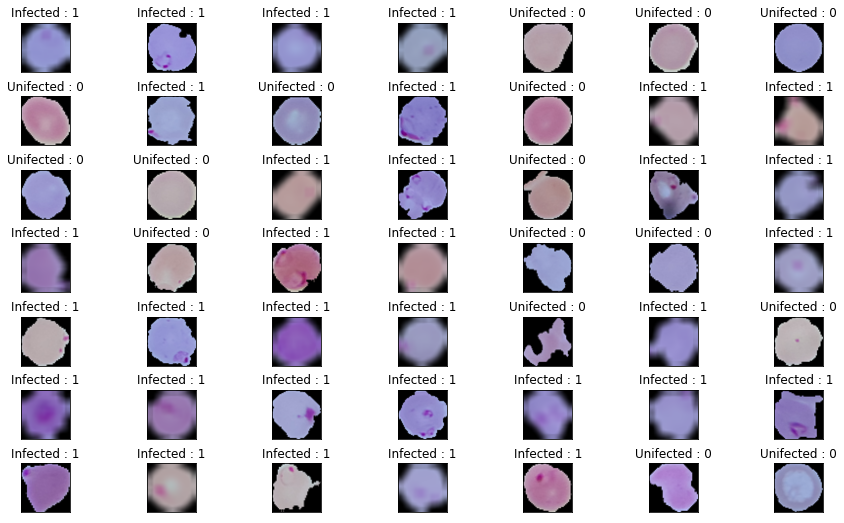

In [ ]:
#ploting images and labels to understand the data
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , data.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(data[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

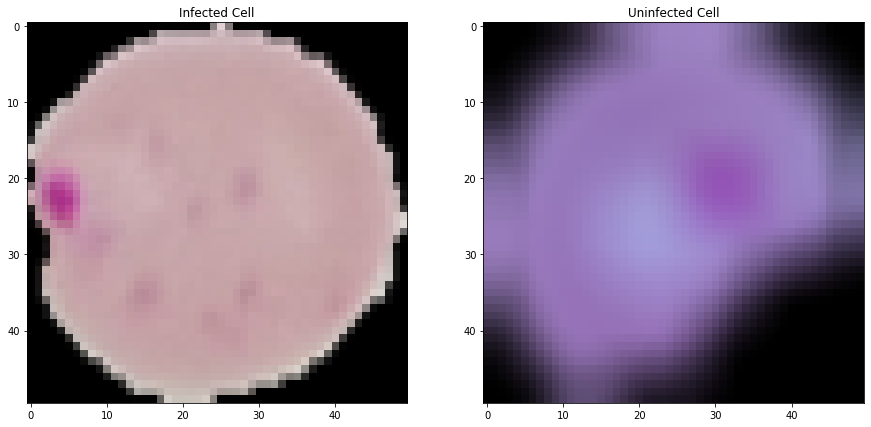

In [ ]:
#compare between infected and uninfected images 
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(data[0])
plt.title('Infected Cell')

plt.subplot(1 , 2 , 2)
plt.imshow(data[12499])
plt.title('Uninfected Cell')


plt.show()

In [ ]:
#normalize the images
data = data.astype(np.float32)
labels = labels.astype(np.int32)
data = data/255

In [ ]:
#mobilenet model
mobilenet = MobileNetV2(weights='imagenet' , include_top=False)
print(mobilenet)

In [ ]:
#show layers
for i , lyr in enumerate(mobilenet.layers):
  print(lyr.name , i)

input_2 0
Conv1_pad 1
Conv1 2
bn_Conv1 3
Conv1_relu 4
expanded_conv_depthwise 5
expanded_conv_depthwise_BN 6
expanded_conv_depthwise_relu 7
expanded_conv_project 8
expanded_conv_project_BN 9
block_1_expand 10
block_1_expand_BN 11
block_1_expand_relu 12
block_1_pad 13
block_1_depthwise 14
block_1_depthwise_BN 15
block_1_depthwise_relu 16
block_1_project 17
block_1_project_BN 18
block_2_expand 19
block_2_expand_BN 20
block_2_expand_relu 21
block_2_depthwise 22
block_2_depthwise_BN 23
block_2_depthwise_relu 24
block_2_project 25
block_2_project_BN 26
block_2_add 27
block_3_expand 28
block_3_expand_BN 29
block_3_expand_relu 30
block_3_pad 31
block_3_depthwise 32
block_3_depthwise_BN 33
block_3_depthwise_relu 34
block_3_project 35
block_3_project_BN 36
block_4_expand 37
block_4_expand_BN 38
block_4_expand_relu 39
block_4_depthwise 40
block_4_depthwise_BN 41
block_4_depthwise_relu 42
block_4_project 43
block_4_project_BN 44
block_4_add 45
block_5_expand 46
block_5_expand_BN 47
block_5_expand

In [ ]:
#freezing the top 68 layers of the network
for lyr in mobilenet.layers[:126]:
  lyr.trainable=False

for lyr in mobilenet.layers:
  print(lyr.name,lyr.trainable)

input_2 False
Conv1_pad False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False

In [ ]:
#add a global spatial average pooling
x = mobilenet.output
print(x.shape)

(None, None, None, 1280)


In [ ]:
x = GlobalAveragePooling2D()(x)

In [ ]:
# let's add a fully-connected layer
x = Dense(1280, activation='relu')(x)

In [ ]:
# and a logistic layer -- we have 2 classes
predictions = Dense(2, activation='softmax')(x)

In [ ]:
# this is the model we will train 
model = Model(inputs=mobilenet.input, outputs=predictions)

In [ ]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_2
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

In [ ]:
#split the data to test and train
X_train ,X_test, y_train , y_test = train_test_split(data , labels ,test_size = 0.2 , random_state = 42)
print('train data shape {} ,test data shape {}'.format(X_train.shape, X_test.shape))

train data shape (33071, 50, 50, 3) ,test data shape (8268, 50, 50, 3)


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])
print(y_test[0])


[0. 1.]
[0. 1.]


In [ ]:
train = model.fit(X_train[:], y_train[:], validation_data=(X_test, y_test), 
            epochs= 10)

Epoch 1/10
1034/1034 [==============================] - 12s 12ms/step - loss: 0.2559 - val_loss: 0.6359
Epoch 2/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1729 - val_loss: 0.5124
Epoch 3/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1551 - val_loss: 0.3406
Epoch 4/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1429 - val_loss: 0.2028
Epoch 5/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1336 - val_loss: 0.1484
Epoch 6/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1322 - val_loss: 0.1344
Epoch 7/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1257 - val_loss: 0.1278
Epoch 8/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1184 - val_loss: 0.1295
Epoch 9/10
1034/1034 [==============================] - 12s 11ms/step - loss: 0.1169 - val_loss: 0.1267
Epoch 10/10
1034/1034 [==============================] - 12s 11m

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
____________________________________________________________________________________________


history dict: {'loss': [0.2559262812137604, 0.1728847622871399, 0.15509214997291565, 0.14286096394062042, 0.1336299479007721, 0.1321529597043991, 0.1257481724023819, 0.11838282644748688, 0.11685033142566681, 0.11167581379413605], 'val_loss': [0.6359217762947083, 0.5123686790466309, 0.3406149446964264, 0.20284712314605713, 0.14841845631599426, 0.13436387479305267, 0.12777356803417206, 0.1294553130865097, 0.1267261803150177, 0.1278820037841797]}
259/259 - 2s - loss: 0.1279
0.1278820037841797


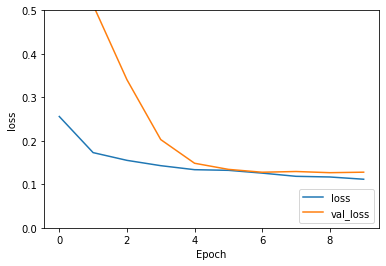

In [ ]:
#Evaluate the model
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')

print('\nhistory dict:', train.history)
test_loss = model.evaluate(X_test,  y_test, verbose=2)
print(test_loss)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
model.save('/content/drive/My Drive/cell_images/cell_images/PretrainedModel.model')

In [ ]:
import tensorflow as tf
new_model=tf.keras.models.load_model('/content/drive/My Drive/cell_images/cell_images/PretrainedModel.model')

In [ ]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = new_model.predict(X_test)

In [ ]:
print(y_pred.shape,y_test.shape)

(8268, 2) (8268, 2)


In [ ]:
print(y_pred[:5])

[[1.7714365e-04 9.9982291e-01]
 [3.9772215e-04 9.9960226e-01]
 [8.2034694e-06 9.9999177e-01]
 [1.6627033e-05 9.9998343e-01]
 [1.3078854e-03 9.9869210e-01]]


In [ ]:
t=0.5
k=0
for i,j in y_pred:
  if i<t:
    y_pred[k][0]=0
    y_pred[k][1]=1
  elif i>t:
    y_pred[k][0]=1
    y_pred[k][1]=0
  k=k+1    


In [ ]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2768
           1       0.96      0.96      0.96      5500

   micro avg       0.95      0.95      0.95      8268
   macro avg       0.94      0.94      0.94      8268
weighted avg       0.95      0.95      0.95      8268
 samples avg       0.95      0.95      0.95      8268



In [ ]:
from sklearn.metrics import roc_auc_score

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') 
print(ROCAUCScore)

0.9501693275278181
